In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Prepare appropriate data type
from sklearn.preprocessing import LabelEncoder

# Plot the feature of decision tree
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

# Compare the Logistic Regression Model V.S. Decision Tree Model V.S. Random Forest Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from numpy.core.umath_tests import inner1d

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.


# **I. Data Exploration**



In [3]:
df = pd.read_csv('/content/gdrive/My Drive/110_02/Data_Minig/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.shape

(1470, 35)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
#the number of attrition and retention
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [6]:
#percentage of attrition and percentage of retention
Attrition_Rate=df.Attrition.value_counts()/len(df)
print(f"No Attrition:{Attrition_Rate[0]*100:.2f}%")
print(f"Attrition:{Attrition_Rate[1]*100:.2f}%")

No Attrition:83.88%
Attrition:16.12%


### **A. Use charts to show the relationship between variables**

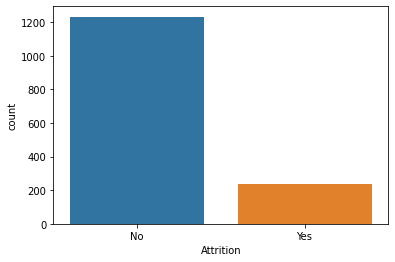

In [7]:
sns.countplot(x='Attrition', data=df,order={'No','Yes'})
df_1 = pd.read_csv('/content/gdrive/My Drive/110_02/Data_Minig/WA_Fn-UseC_-HR-Employee-Attrition.csv')


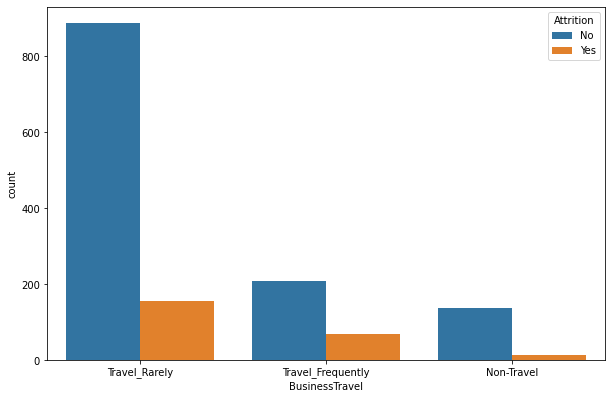

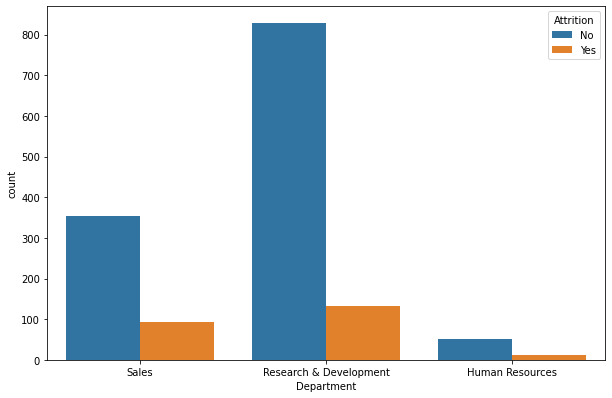

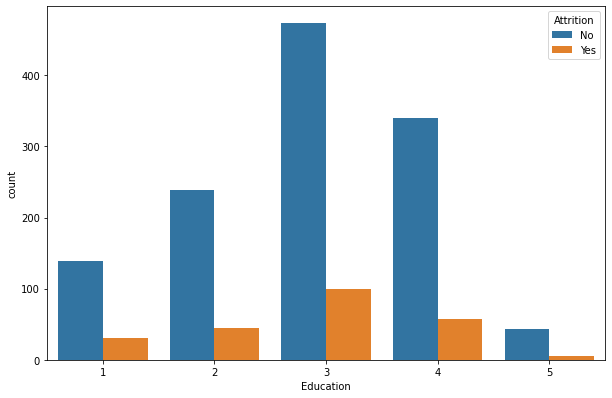

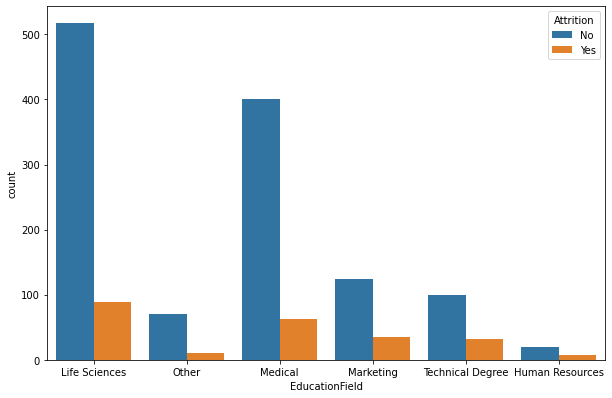

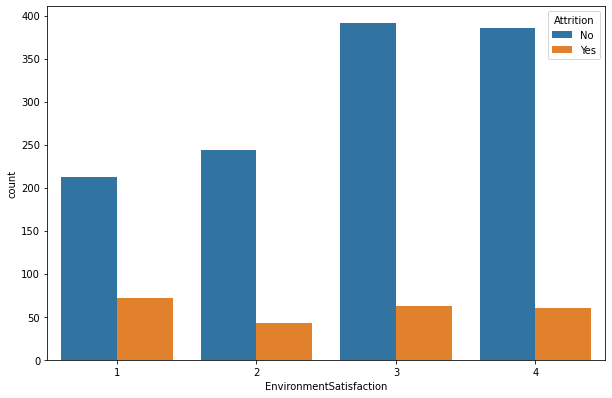

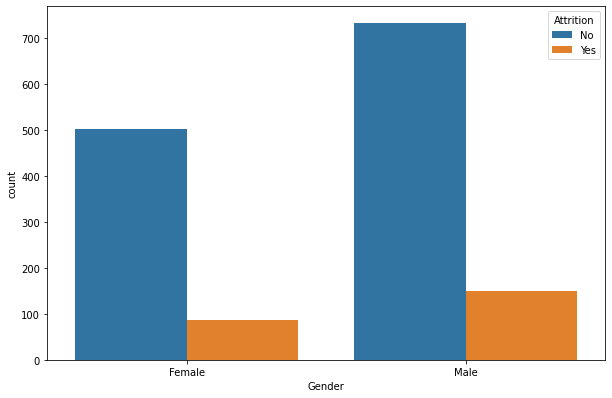

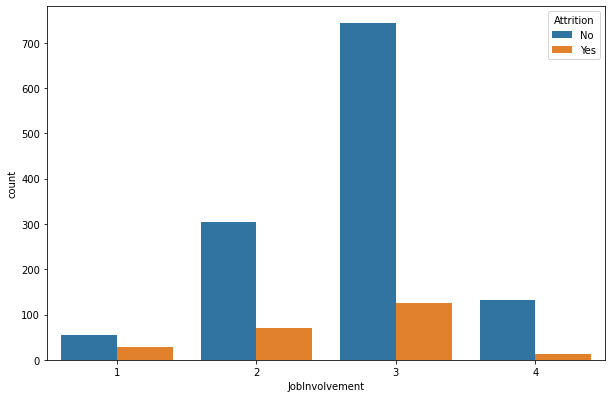

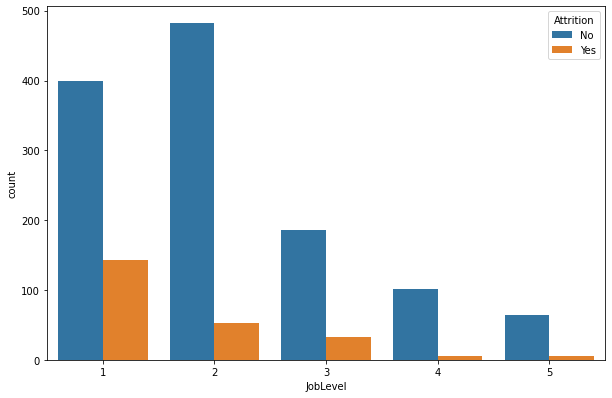

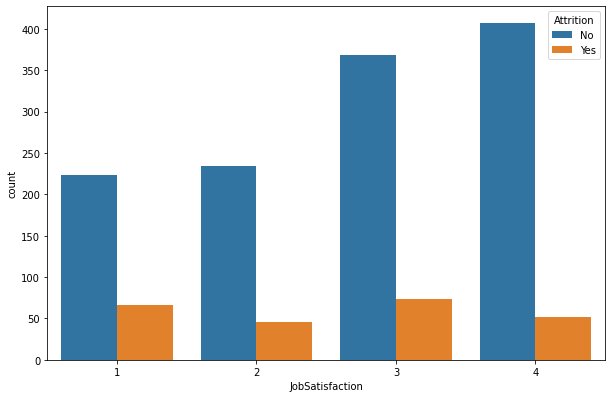

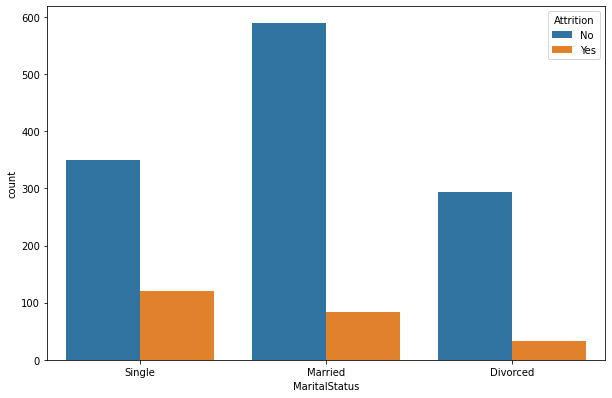

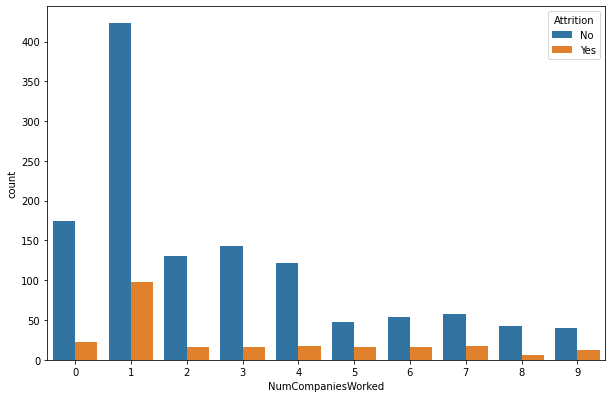

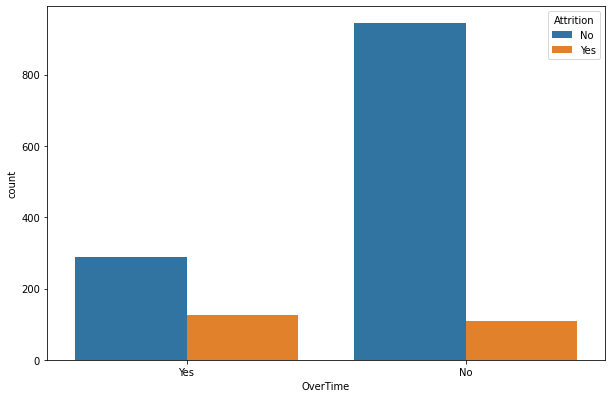

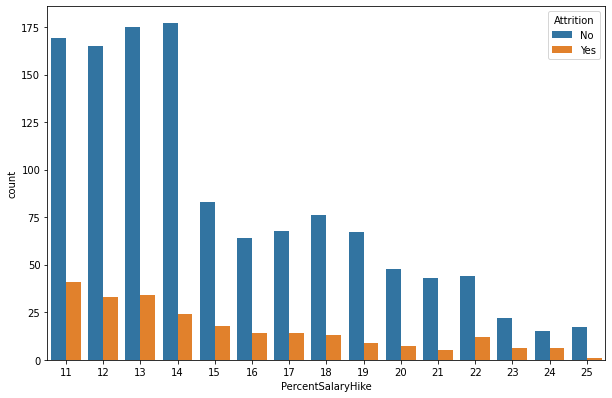

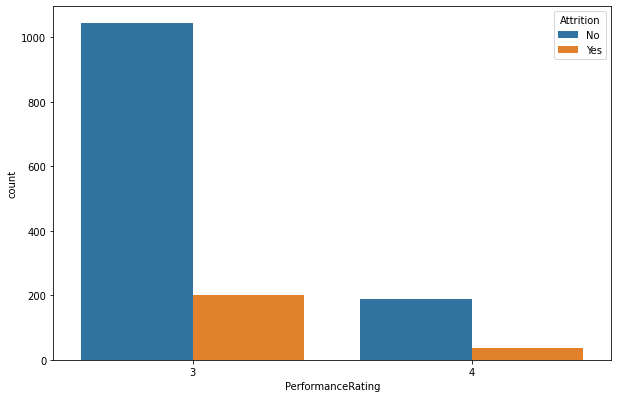

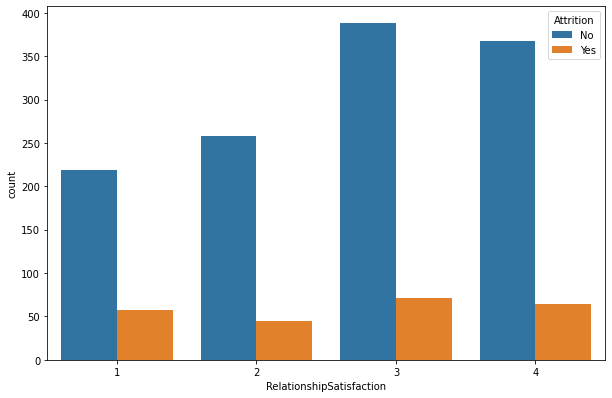

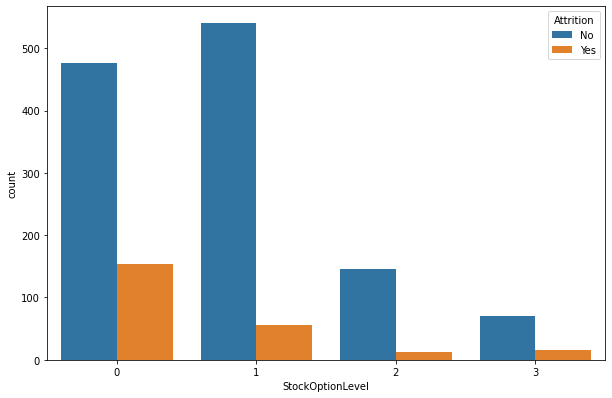

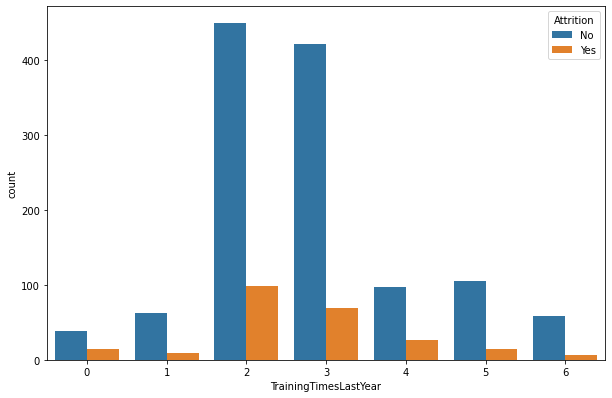

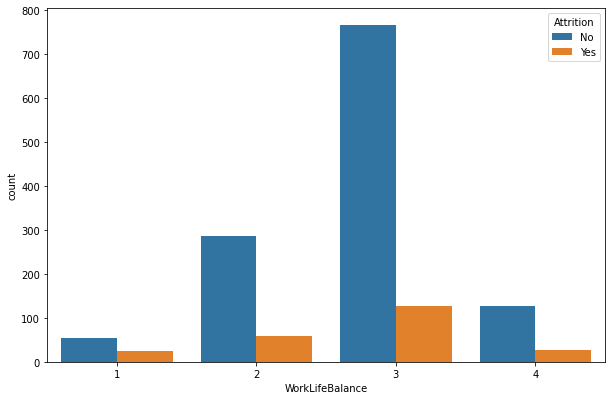

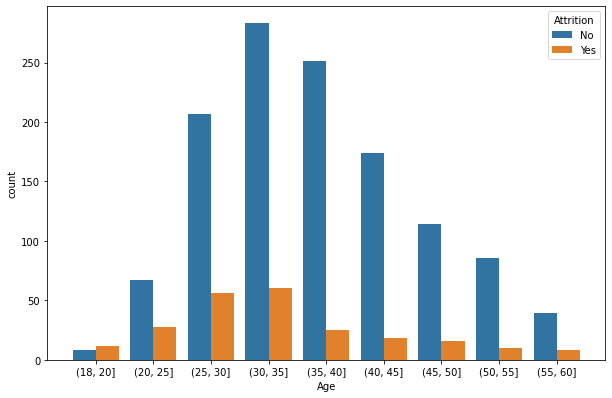

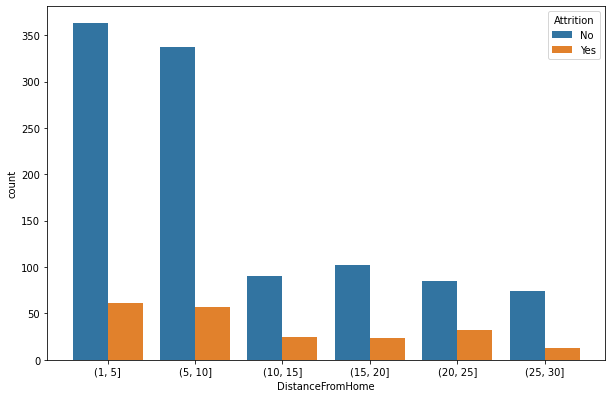

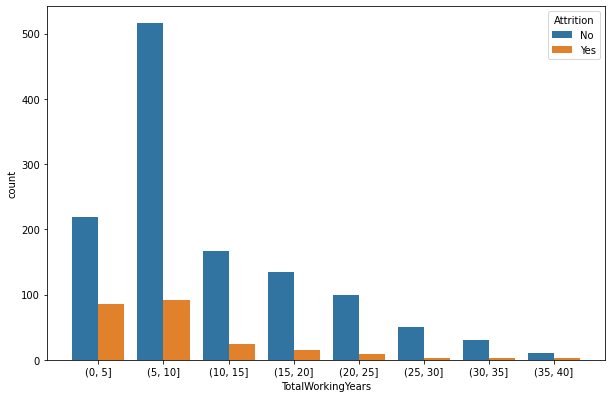

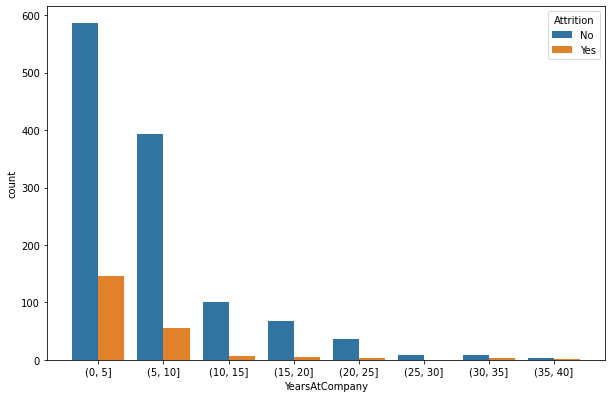

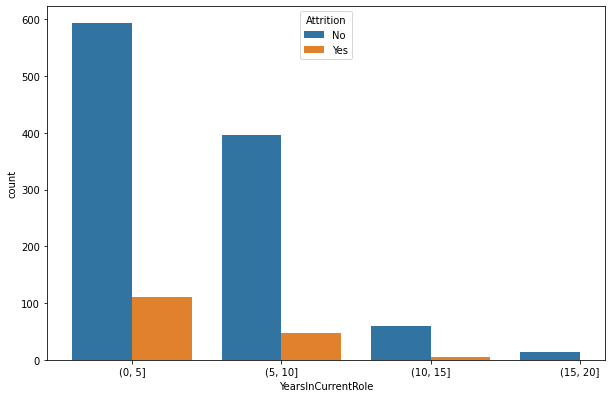

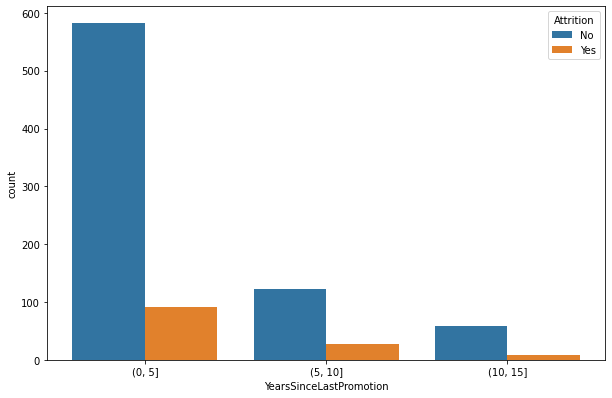

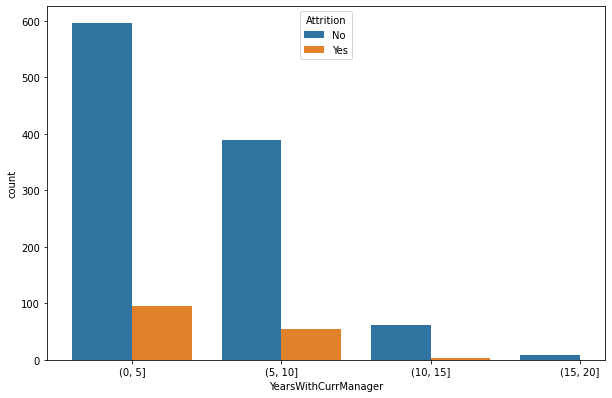

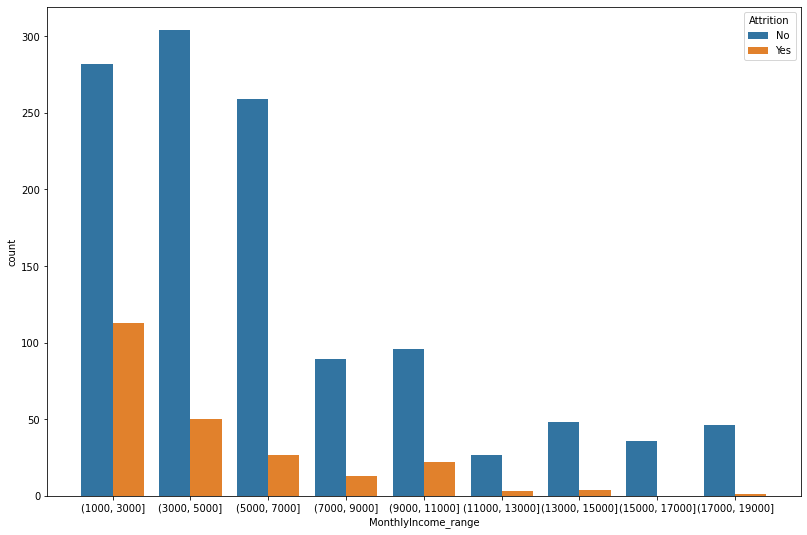

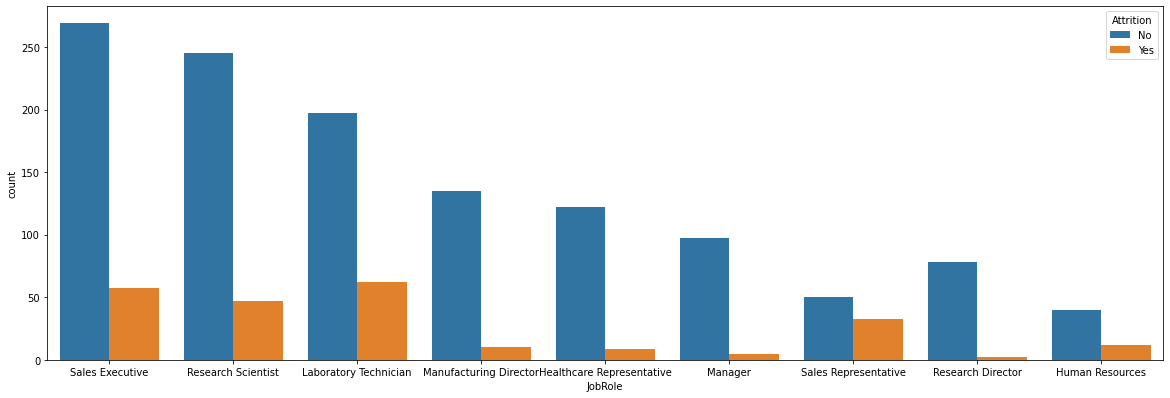

In [8]:
columns = ["BusinessTravel",'Department',"Education","EducationField",
           "EnvironmentSatisfaction","Gender","JobInvolvement","JobLevel","JobSatisfaction",
           "MaritalStatus","NumCompaniesWorked","OverTime","PercentSalaryHike",
           "PerformanceRating","RelationshipSatisfaction","StockOptionLevel",
           "TrainingTimesLastYear","WorkLifeBalance"]

for i in columns:
  fig_dims = (10, 6.5)
  fig, ax = plt.subplots(figsize=fig_dims)
  a= sns.countplot(x=i,ax=ax,data=df_1,hue="Attrition",hue_order=["No","Yes"])
  plt.show()

#為了讓圖片更清晰，另外畫Age、DistanceFromHome、MonthlyIncome、TotalWorkingYears、YearsAtCompany、YearsInCurrentRole、YearsSinceLastPromotion、YearsWithCurrManager、JobRole:
##Age
df_1['Age']=pd.cut(df_1['Age'],[18,20,25,30,35,40,45,50,55,60])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Age',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

##DistanceFromHome
df_1['DistanceFromHome']=pd.cut(df_1['DistanceFromHome'],[1,5,10,15,20,25,30])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='DistanceFromHome',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

##TotalWorkingYears
df_1['TotalWorkingYears']=pd.cut(df_1['TotalWorkingYears'],[0,5,10,15,20,25,30,35,40])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

#YearsAtCompany
df_1['YearsAtCompany']=pd.cut(df_1['YearsAtCompany'],[0,5,10,15,20,25,30,35,40])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='YearsAtCompany',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

#YearsInCurrentRole
df_1['YearsInCurrentRole']=pd.cut(df_1['YearsInCurrentRole'],[0,5,10,15,20])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

#YearsSinceLastPromotion
df_1['YearsSinceLastPromotion']=pd.cut(df_1['YearsSinceLastPromotion'],[0,5,10,15])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

#YearsWithCurrManager
df_1['YearsWithCurrManager']=pd.cut(df_1['YearsWithCurrManager'],[0,5,10,15,20])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

##MonthlyIncome
df_1['MonthlyIncome_range']=pd.cut(df_1['MonthlyIncome'],[1000,3000,5000,7000,9000,11000,13000,15000,17000,19000])
fig_dims = (13.5,9)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='MonthlyIncome_range',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

##JobRole
fig_dims = (20, 6.5)
fig, ax = plt.subplots(figsize=fig_dims)
a= sns.countplot(x='JobRole',ax=ax,data=df,hue="Attrition",hue_order=["No","Yes"])
plt.show()

### **B. Calculate the correlation between variables**

In [9]:
corr=df.corr()
corr=(corr)
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [10]:
#Eliminate variables that only have one data level
temp = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        temp.append(col)
        df.drop(col,inplace=True,axis=1)
temp

['EmployeeCount', 'Over18', 'StandardHours']

I eliminated "Employee Count", "Over 18", and "Standard Hours" which only have unique data levels. And I also deleted "EmployeeNumber" because I thinked it didn't have relationship with whether the employee resigned or not.

In [11]:
df.drop(labels=['EmployeeNumber'],axis=1,inplace=True)
corr=df.corr()
corr=(corr)

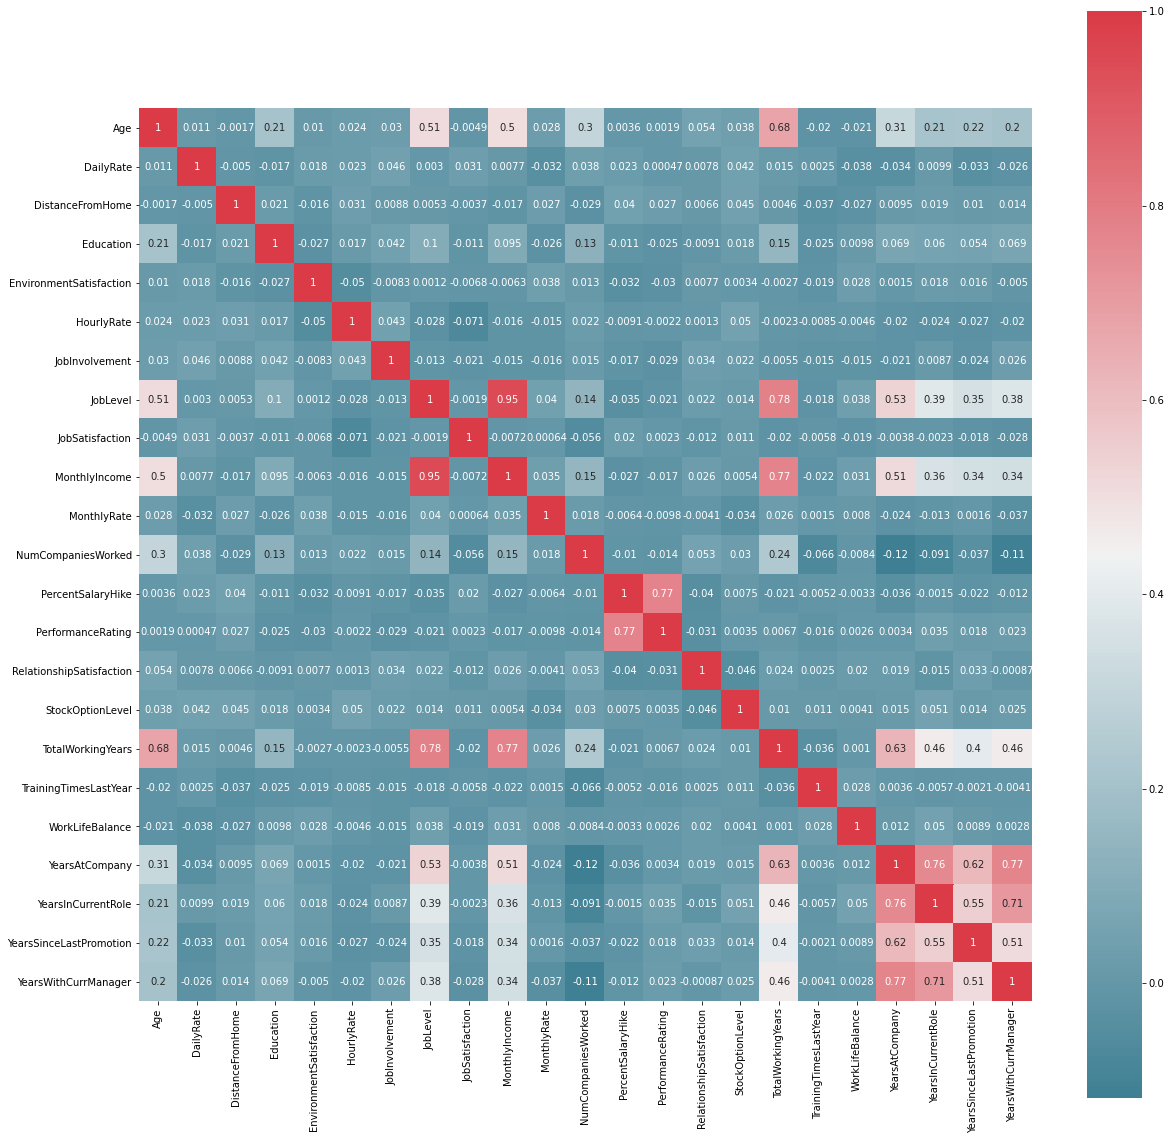

In [12]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

Then delete "Daily Rate", "Hourly Rate", and "Monthly Rate" because these three variables have a low correlation to the employees' attrition.

In [13]:
df.drop(['DailyRate', 'HourlyRate', 'MonthlyRate'], axis = 1, inplace = True)

# **II. Data Interpretation**

### **A. Human Resources have highest monthly income in non-managerial roles but didn't have lowest attrition rate.**

In [14]:
Attrition={"Yes":1, 'No':0}
df.Attrition=[Attrition[item] for item in df.Attrition]

In [15]:
jobrole_income = df.groupby('JobRole', as_index=False)[['MonthlyIncome', 'Attrition']].mean().sort_values(by=['MonthlyIncome'])
jobrole_income

,JobRole,MonthlyIncome,Attrition
8,Sales Representative,2626.000000,0.397590
2,Laboratory Technician,3237.169884,0.239382
6,Research Scientist,3239.972603,0.160959
1,Human Resources,4235.750000,0.230769
7,Sales Executive,6924.279141,0.174847
4,Manufacturing Director,7295.137931,0.068966
0,Healthcare Representative,7528.763359,0.068702
5,Research Director,16033.550000,0.025000
3,Manager,17181.676471,0.049020


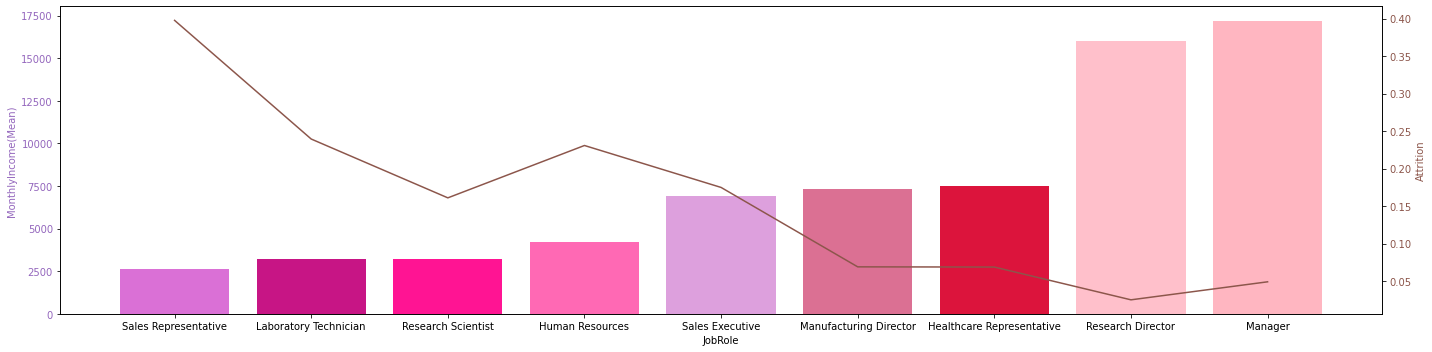

In [16]:
fig, ax1 = plt.subplots(figsize=(20,5))
color = 'tab:purple'
ax1.set_xlabel('JobRole')
ax1.set_ylabel('MonthlyIncome(Mean)',color=color)
ax1.bar(jobrole_income['JobRole'], jobrole_income['MonthlyIncome'],color=['orchid', 'mediumvioletred', 'deeppink', 'hotpink', 'plum'
                                                                   ,'palevioletred','crimson','pink','lightpink'])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
ax2.set_ylabel('Attrition', color=color)  # we already handled the x-label with ax1
ax2.plot(jobrole_income['JobRole'], jobrole_income['Attrition'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Pareto Chart reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py

Then, we consider "YearSinceLasrPromotion". We found that Human Resources promotion is the fastest in non-managerial roles.

In [17]:
df.groupby('JobRole', as_index=False)[['YearsSinceLastPromotion']].mean().sort_values(by=['YearsSinceLastPromotion'])

,JobRole,YearsSinceLastPromotion
8,Sales Representative,1.060241
1,Human Resources,1.269231
2,Laboratory Technician,1.420849
6,Research Scientist,1.506849
4,Manufacturing Director,2.117241
7,Sales Executive,2.484663
0,Healthcare Representative,2.969466
5,Research Director,3.187500
3,Manager,4.833333


However, we found that Human Resources have the lowest satification toward their jobs.

In [18]:
df.groupby('JobRole', as_index=False)[['JobSatisfaction']].mean().sort_values(by=['JobSatisfaction'])

,JobRole,JobSatisfaction
1,Human Resources,2.557692
4,Manufacturing Director,2.682759
2,Laboratory Technician,2.691120
5,Research Director,2.700000
3,Manager,2.705882
8,Sales Representative,2.734940
7,Sales Executive,2.754601
6,Research Scientist,2.773973
0,Healthcare Representative,2.786260


Through we interview the employee, we can know the reasons why they didn't satisfy their jobs so they quit.

### **B. Employees who worked in 2-4 companies are less likely to leave. Also, the females are inclined to have lower attrition than males when they have worked in over two companies.**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


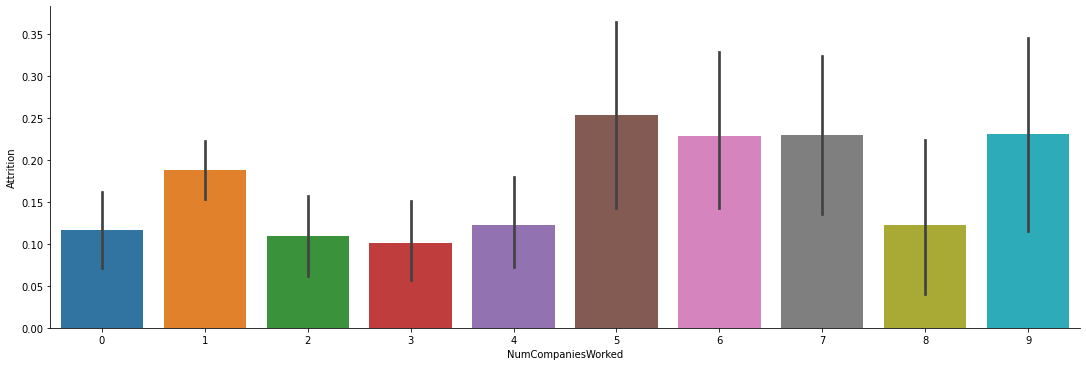

In [19]:
sns.factorplot(x = 'NumCompaniesWorked', y = 'Attrition', data=df, aspect= 3, kind = 'bar')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


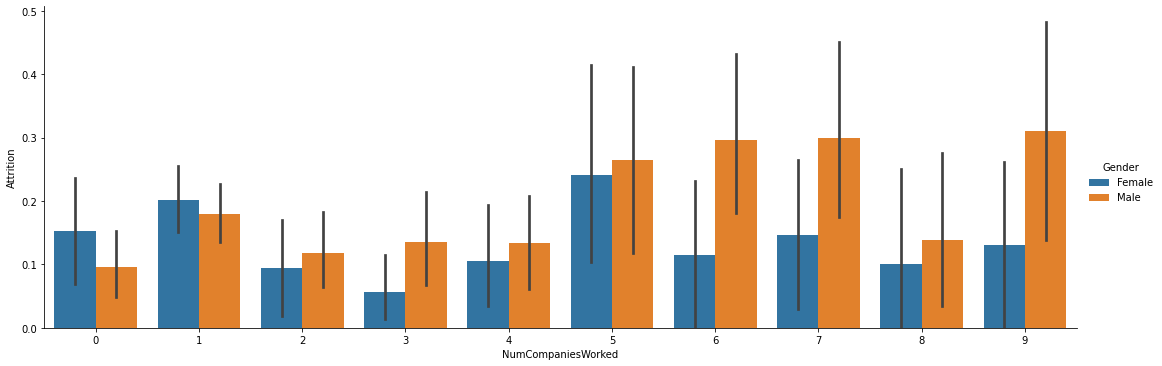

In [20]:
sns.factorplot(x = 'NumCompaniesWorked', y = 'Attrition', hue = 'Gender', data=df, aspect= 3, kind = 'bar')

### **C. Doctors in every job level have a low attrition rate, but they have the highest attrition rate in the third job level.**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


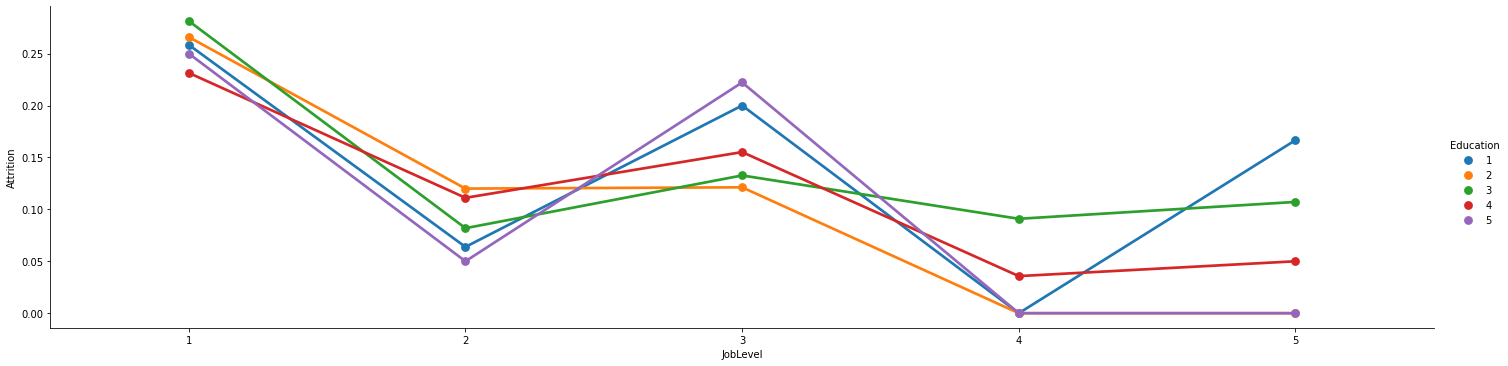

In [21]:
sns.factorplot(x = 'JobLevel', y = 'Attrition', hue = 'Education', data=df, aspect= 4, ci=None)

As we confirmed the job satisfaction, we can find that the doctors usually have the lowest job satisfaction : 

In [22]:
df[df.JobLevel ==3].groupby('Education', as_index=False)[['JobSatisfaction']].mean().sort_values(by=['JobSatisfaction'])

,Education,JobSatisfaction
4,5,2.333333
3,4,2.655172
2,3,2.663265
1,2,2.787879
0,1,2.800000


In [23]:
df[df.JobLevel ==4].groupby('Education', as_index=False)[['YearsSinceLastPromotion']].mean().sort_values(by=['YearsSinceLastPromotion'])

,Education,YearsSinceLastPromotion
3,4,3.821429
1,2,4.823529
2,3,4.863636
4,5,5.555556
0,1,7.500000


We tracked down the reasons for the low job satisfaction of Ph. Ds, and found that it takes the most time for Ph. Ds to be promoted from job level three to job level four.

# **III. Machine Learning**

In [24]:
df.shape

(1470, 28)

In [25]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,2,Laboratory Technician,4,Married,2571,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,3,Healthcare Representative,1,Married,9991,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,Married,6142,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,Sales,2,3,Medical,4,Male,2,2,Sales Executive,2,Married,5390,2,No,14,3,4,0,17,3,2,9,6,0,8


### **A. Decision Tree**

In [26]:
#Binarize Gender, OverTime and Attrition as TRUE and FALSE
df=df.rename(columns = {'Gender':'Male'})

Male={'Male': True,'Female': False}
df.Male = [Male[item] for item in df.Male]

Attrition={1: True ,0: False}
df.Attrition=[Attrition[item] for item in df.Attrition]

OverTime={'Yes': True ,'No': False}
df.OverTime=[OverTime[item] for item in df.OverTime]

df.dtypes

Age                          int64
Attrition                     bool
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Male                          bool
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                      bool
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [27]:
#Store dummy variables as categorical_col[]
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']


In [28]:
df.dtypes

Age                          int64
Attrition                     bool
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Male                          bool
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                      bool
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [29]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Male,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,Travel_Rarely,Sales,1,2,Life Sciences,2,False,3,2,Sales Executive,4,Single,5993,8,True,11,3,1,0,8,0,1,6,4,0,5
1,49,False,Travel_Frequently,Research & Development,8,1,Life Sciences,3,True,2,2,Research Scientist,2,Married,5130,1,False,23,4,4,1,10,3,3,10,7,1,7
2,37,True,Travel_Rarely,Research & Development,2,2,Other,4,True,2,1,Laboratory Technician,3,Single,2090,6,True,15,3,2,0,7,3,3,0,0,0,0
3,33,False,Travel_Frequently,Research & Development,3,4,Life Sciences,4,False,3,1,Research Scientist,3,Married,2909,1,True,11,3,3,0,8,3,3,8,7,3,0
4,27,False,Travel_Rarely,Research & Development,2,1,Medical,1,True,3,1,Laboratory Technician,2,Married,3468,9,False,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,False,Travel_Frequently,Research & Development,23,2,Medical,3,True,4,2,Laboratory Technician,4,Married,2571,4,False,17,3,3,1,17,3,3,5,2,0,3
1466,39,False,Travel_Rarely,Research & Development,6,1,Medical,4,True,2,3,Healthcare Representative,1,Married,9991,4,False,15,3,1,1,9,5,3,7,7,1,7
1467,27,False,Travel_Rarely,Research & Development,4,3,Life Sciences,2,True,4,2,Manufacturing Director,2,Married,6142,1,True,20,4,2,1,6,0,3,6,2,0,3
1468,49,False,Travel_Frequently,Sales,2,3,Medical,4,True,2,2,Sales Executive,2,Married,5390,2,False,14,3,4,0,17,3,2,9,6,0,8


In [30]:
df1 = df.copy()
df1['Attrition'] = df1.Attrition.astype("category").cat.codes

label = LabelEncoder()

for column in categorical_col:
    df1[column] = label.fit_transform(df1[column])

In [31]:
X = df1.drop('Attrition', axis=1)
y = df1.Attrition

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [32]:
max_depth = list(range(1,20))
criterion = ["gini","entropy"]
splitter = ["best","random"]
min_samples_split = [2,3,4]
min_samples_leaf = list(range(1,20))
params_grid = {'max_depth': max_depth,'criterion':criterion,'splitter':splitter,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

dtree_clf = DecisionTreeClassifier()
dtree_clf_cv= GridSearchCV(dtree_clf ,params_grid, cv=10)
dtree_clf_cv.fit(X_train, y_train)
best_params = dtree_clf_cv.best_params_
print(f"Best paramters: {best_params})")

dtree_clf = DecisionTreeClassifier(**best_params)
dtree_clf.fit(X_train, y_train)


pred = dtree_clf_cv.predict(X_test)
dtree_clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n\n ---Decision Tree Model ---")
dtree_auc = accuracy_score(y_test,pred)
print (f"Decision Tree AUC: {dtree_auc*100:.2f}%")
print(dtree_clf_report)

Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 16, 'min_samples_split': 4, 'splitter': 'random'})


 ---Decision Tree Model ---
Decision Tree AUC: 85.49%
                    0          1  accuracy   macro avg  weighted avg
precision    0.875000   0.658537  0.854875    0.766768      0.837205
recall       0.961538   0.350649  0.854875    0.656094      0.854875
f1-score     0.916230   0.457627  0.854875    0.686929      0.836157
support    364.000000  77.000000  0.854875  441.000000    441.000000


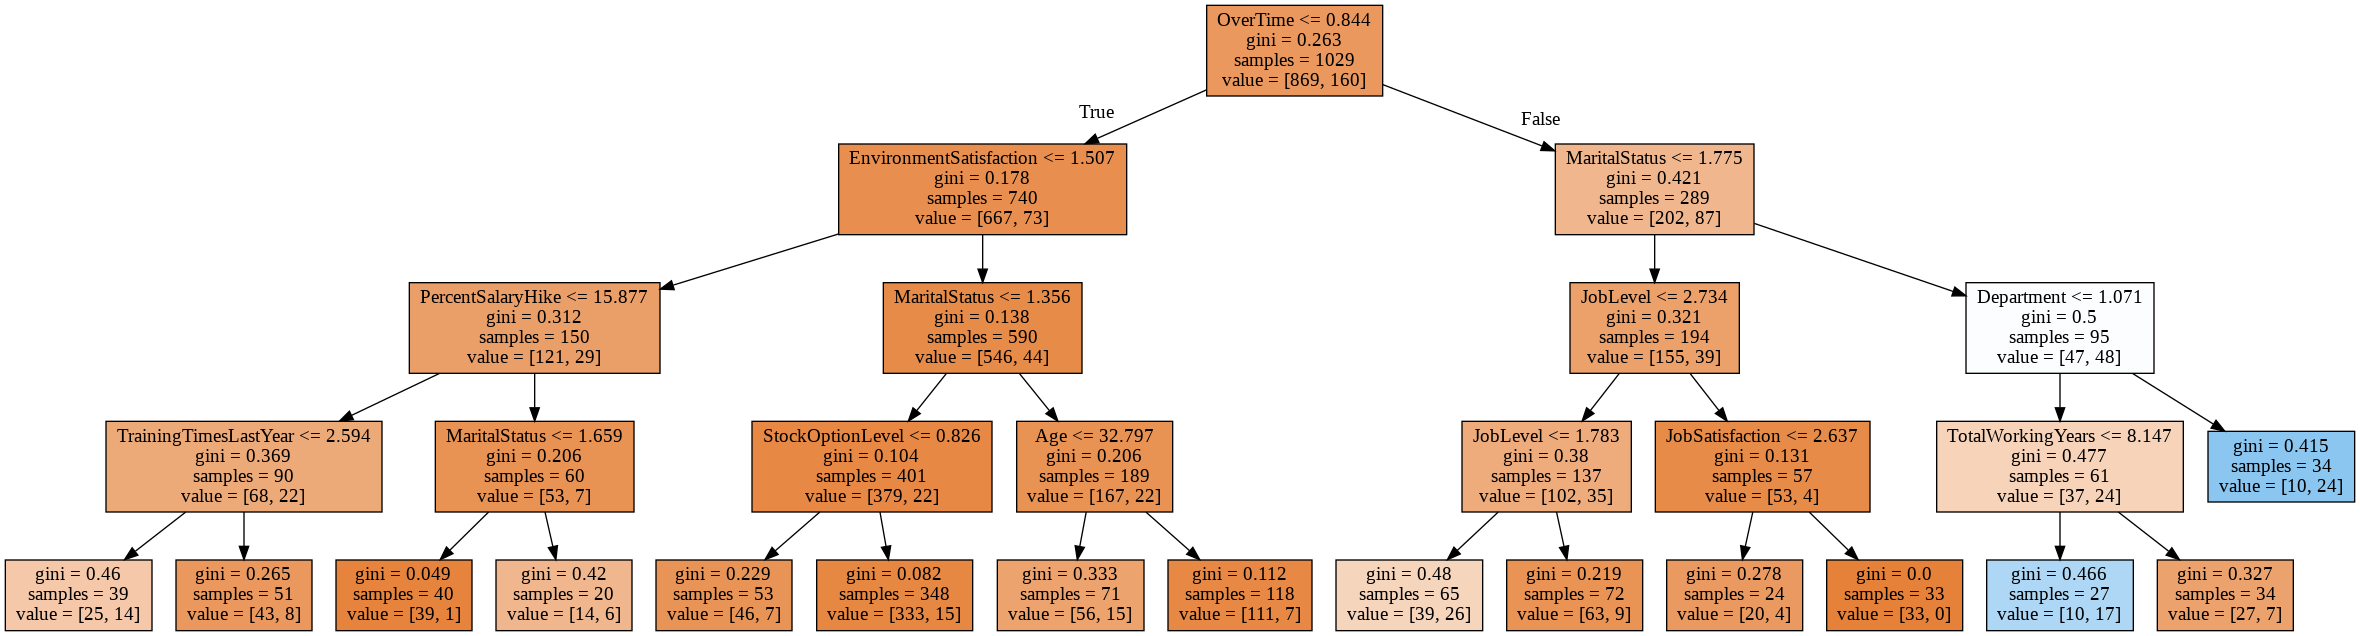

In [33]:
features = list(df1.columns)
features.remove("Attrition")

dot_data = StringIO()
export_graphviz(dtree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### **B. Random Forest**

In [34]:
#Random Forest Model
n_estimators = [100,1000]
min_samples_split = [10]
class_weight=['balanced']
params_grid = {'n_estimators': n_estimators,'min_samples_split':min_samples_split,'class_weight':class_weight}
rforest=RandomForestClassifier()
rforest_cv = GridSearchCV(rforest ,params_grid, cv=10)
rforest_cv.fit(X_train, y_train)
pred = rforest_cv.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n\n --- Random Forest Model ----")
rforest_auc = accuracy_score(y_test,pred)
print(f"Random forest AUC:{rforest_auc*100:.2f}%")
print(clf_report)



 --- Random Forest Model ----
Random forest AUC:85.71%
                    0          1  accuracy   macro avg  weighted avg
precision    0.864407   0.750000  0.857143    0.807203      0.844431
recall       0.980769   0.272727  0.857143    0.626748      0.857143
f1-score     0.918919   0.400000  0.857143    0.659459      0.828314
support    364.000000  77.000000  0.857143  441.000000    441.000000


### **C. Logistic Regression Model**

In [35]:
#Logistic Regression Model
penalty = ['l2','none']
params_grid = {'penalty':penalty}
logit = LogisticRegression()
logit_cv = GridSearchCV(logit ,params_grid, cv=10)
logit_cv.fit(X_train, y_train)
pred = logit_cv.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print ("\n\n ---Logistic Model---")
logit_auc = accuracy_score(y_test,pred)
print (f"Logistic AUC : {logit_auc*100:.2f}%")
print(clf_report)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 ---Logistic Model---
Logistic AUC : 82.09%
                    0          1  accuracy   macro avg  weighted avg
precision    0.833724   0.428571  0.820862    0.631148      0.762983
recall       0.978022   0.077922  0.820862    0.527972      0.820862
f1-score     0.900126   0.131868  0.820862    0.515997      0.765986
support    364.000000  77.000000  0.820862  441.000000    441.000000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### **D. Compare The Accuracy Of Logistic Regression Model, Decision Tree Model, and Random Forest Model**

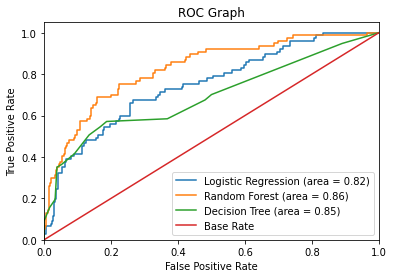

In [36]:
# Create ROC Graph
fpr, tpr, thresholds = roc_curve(y_test, logit_cv.predict_proba(X_test)[:,1])
#The first column is the probability that the entry has the -1 label 
#and the second column is the probability that the entry has the +1 label.
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rforest_cv.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree_clf_cv.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rforest_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dtree_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()